#Bias and variance

by Linh Van Nguyen <contact@linhvannguyen.com>

as a part of the demonstration galeries for <a href='http://scikit-learn.org/stable/'>sklearn</a> Machine Learning python package.

------------
More complicated models usually improve the regression/classification results, but not always. How high order of a model should be enough? This note demonstrates the idea of bias and variance, and how to use this idea in model selection. 

## Underfitting vs Overfitting <a id='part1'></a>

To qualify a ML model, one should decompose its generalization error into bias, variance and noise terms. Its bias is the average error for different training sets; the variance indicates how sensitive the model is to varying training sets; noise is a property of the data

*Underfitting* and *Overfitting* are two common terms used to describe a ML model whether it is too simple or too complicated. 

* *Underfitting* is a ML so simple that cannot capture the underlying trend of the data. This model is told to be *high-bias, low-variance*: it fits not very well the training data, but its performance remains quite the same for testing data.

* *Overfitting* is a complicated ML models that fits perfectly the training data, including noises. Its performance however is very bad for testing data. This kind of models has *low-bias, high variance* property.

### Example: polynomial fit

We will simulate a noisy and discret 1D cosin signal:

$$ y=cos\left(\frac{3}{2}\pi x\right) +n $$

The training data is constructed by choosing of 30 different values of $x \in [0,1] $. Noises are white Gaussian noise with standard deviation $\sigma^2=0.1$. Testing data is constructed by choosing 100 values of $x$ uniformly in $[0,1]$. Testing target values $y^{test}$ are given by the cosin without noises.


In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
np.random.seed(0)

N_train = 30
degrees = [1, 4, 15]

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X_train = np.sort(np.random.rand(N_train))
y_train = true_fun(X_train) + np.random.randn(N_train) * 0.1

X_test = np.linspace(0, 1, 100)
y_test = true_fun(X_test)

We use three different models to fit the function for the training data: linear regression with polynomial features of degree 1, 4 and 15. Mean Square Errors (MSE) of each models are estimated using 10-fold cross validation. Concretely, 30 samples in the training data are randomly divided into 10 parts. The polinomial fitting uses 9/10 parts, and MSE is estimated on the 10th one. This is repeated 10 times. Estimated MSE will be the mean value of these 10 estimates.

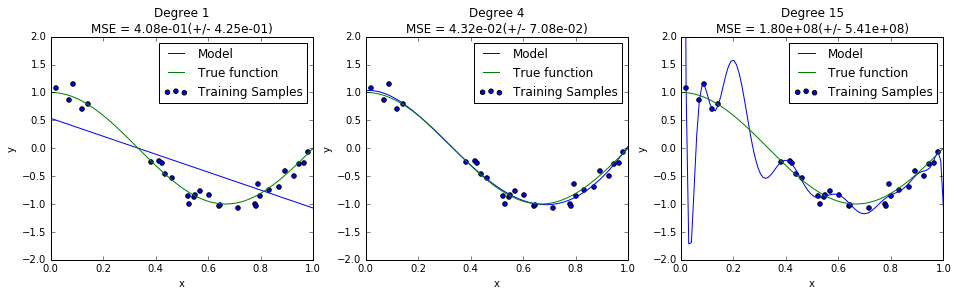

In [10]:
plt.figure(figsize=(16, 4))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    #plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    pipeline.fit(X_train[:, np.newaxis], y_train)

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline, X_train[:, np.newaxis], y_train, 
                                              scoring="mean_squared_error", cv=10)

    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, y_test, label="True function")
    plt.scatter(X_train, y_train, label="Training Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
plt.show()

From the figure, we see that the low order model can at best provide only a poor fit to the samples and the true function because it is too simple (high bias, low variance), the fourth-order model approximates it almost perfectly (bias-variance tradeoff) and the very high-order model approximates the training data perfectly but does not fit the true function very well, i.e. it is very sensitive to varying training data (low bias, high variance).